In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: xlabel='Hours Studied', ylabel='Count'>

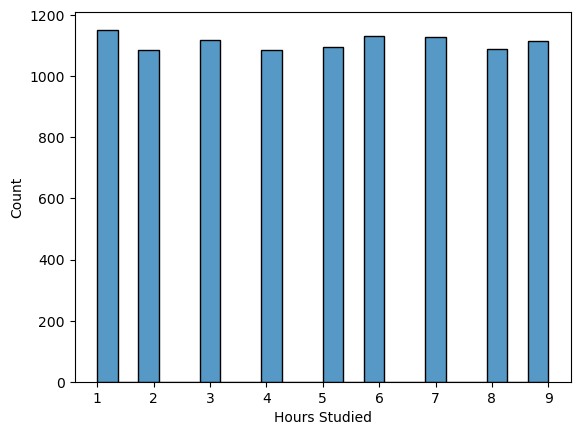

In [9]:
sns.histplot(df['Hours Studied'])

<Axes: xlabel='Previous Scores', ylabel='Count'>

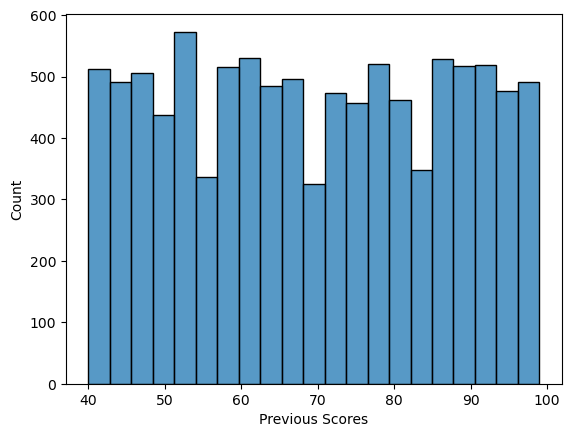

In [10]:
sns.histplot(df['Previous Scores'])

<Axes: xlabel='Sleep Hours', ylabel='Count'>

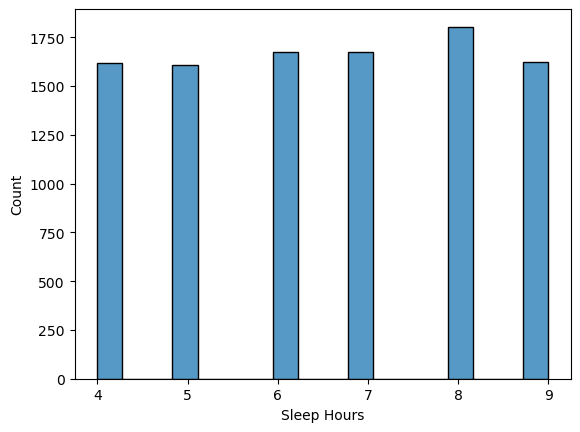

In [11]:
Slsns.histplot(df['Sleep Hours'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Count'>

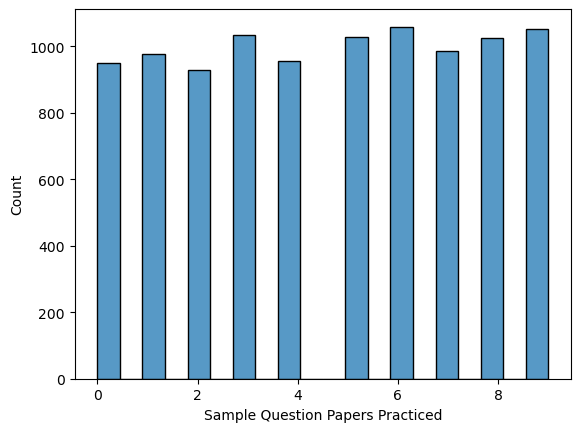

In [12]:
sns.histplot(df['Sample Question Papers Practiced'])

<Axes: xlabel='Performance Index', ylabel='Count'>

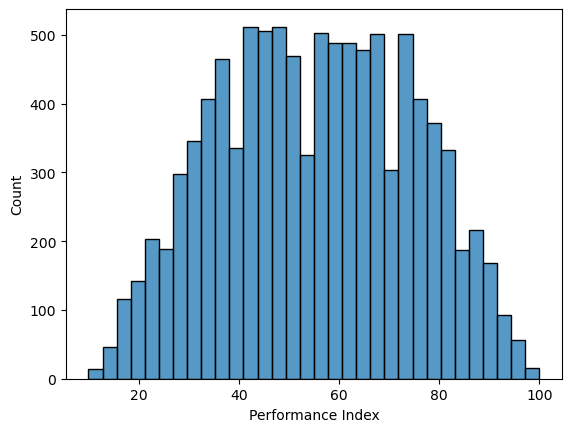

In [13]:
sns.histplot(df['Performance Index'])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

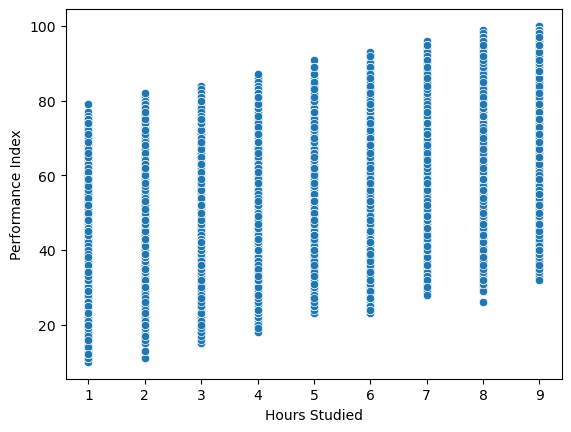

In [15]:
sns.scatterplot(x=df['Hours Studied'],y=df['Performance Index'])

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

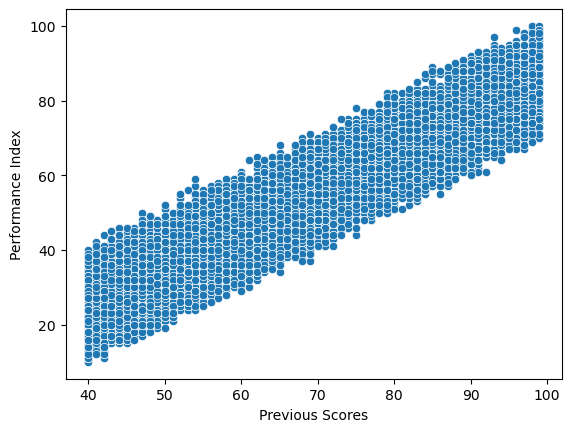

In [16]:
sns.scatterplot(x=df['Previous Scores'],y=df['Performance Index'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

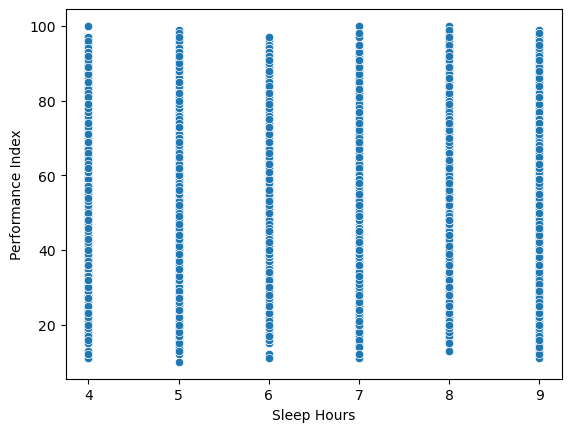

In [17]:
sns.scatterplot(x=df['Sleep Hours'],y=df['Performance Index'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

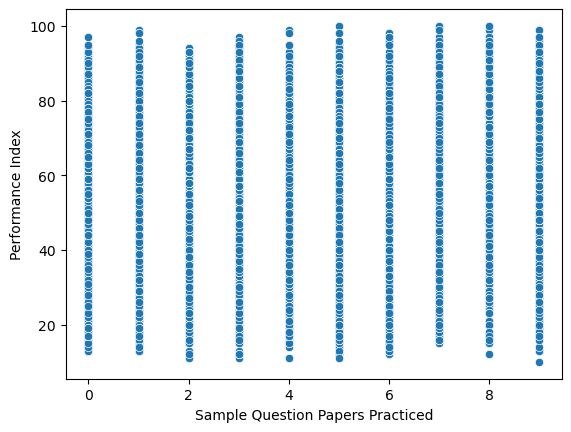

In [19]:
sns.scatterplot(x=df['Sample Question Papers Practiced'],y=df['Performance Index'])

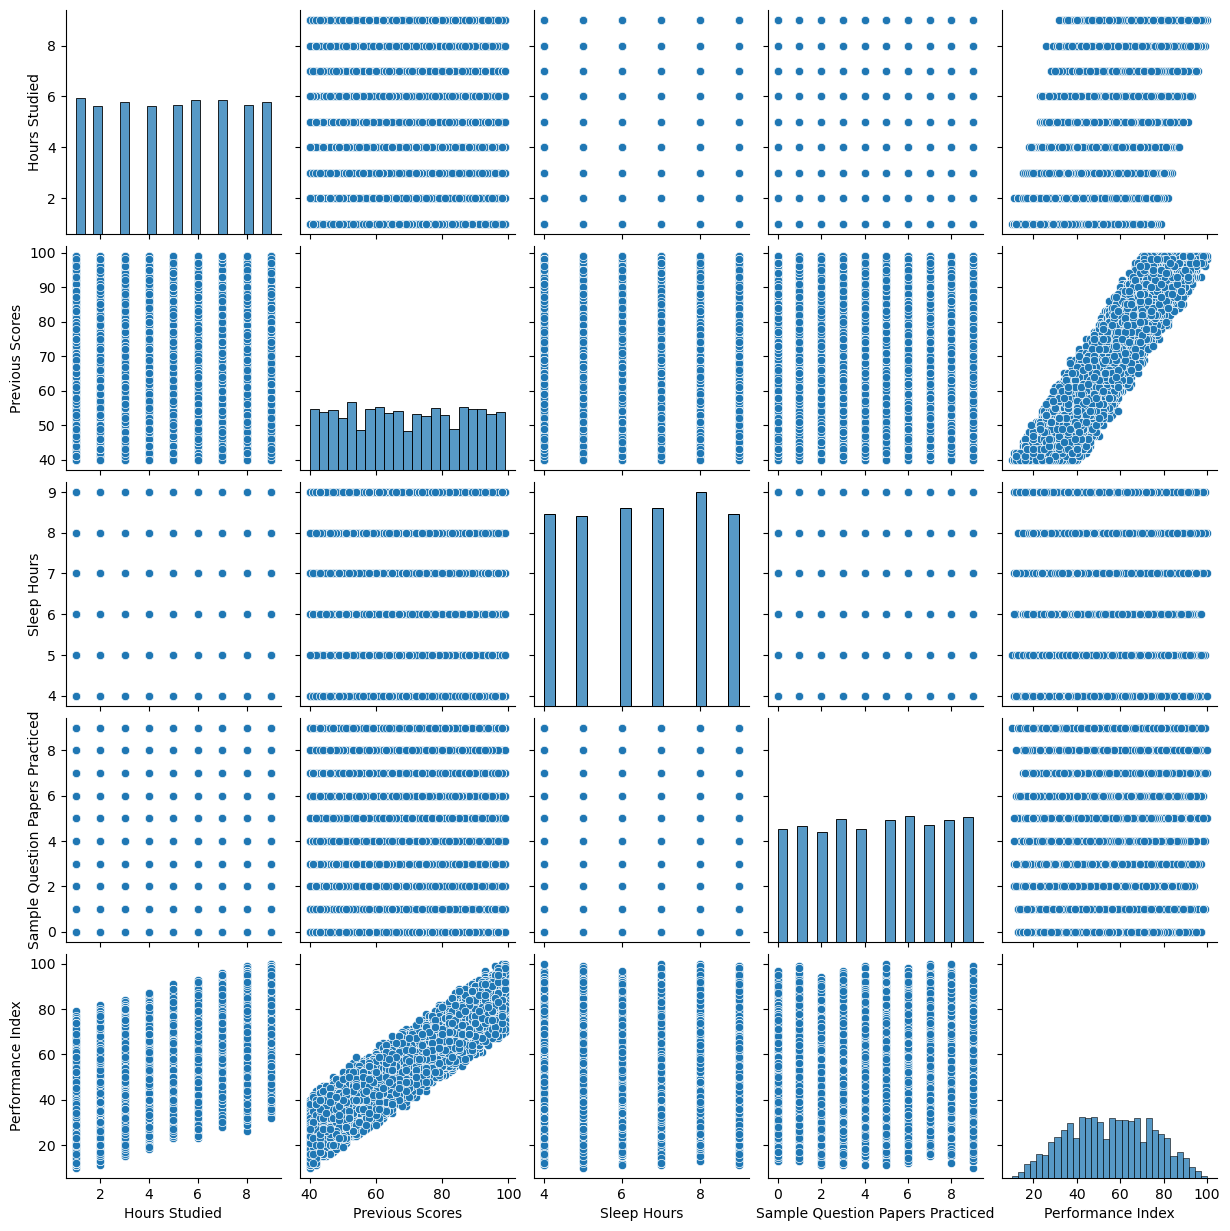

In [20]:
sns.pairplot(df)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
oe=OrdinalEncoder(categories=['Yes','No'])

In [32]:
df[['Extracurricular Activities']]=oe.fit_transform(df[['Extracurricular Activities']].values.reshape(-1,1))

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [29]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({
    'Yes': 1,
    'No': 0
})


In [34]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [35]:
df1=df.copy()

In [36]:
df1=df1.drop(columns=['Performance Index'])

In [37]:
x=df1

In [38]:
y=df['Performance Index']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(x_test)

In [63]:
from sklearn.metrics import root_mean_squared_error,r2_score

In [49]:
root_mean_squared_error(y_test,y_pred)

2.0165722957763483

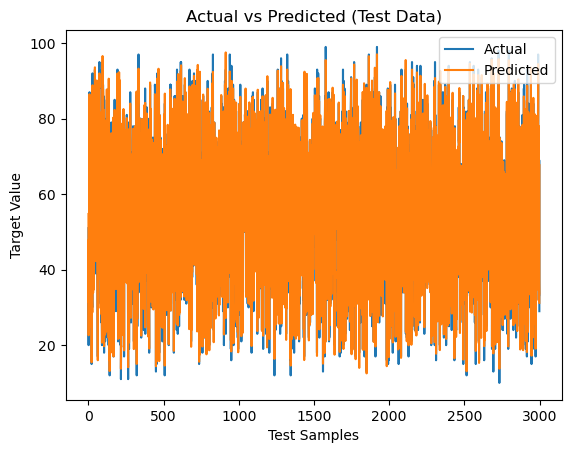

In [50]:
plt.figure()
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel("Test Samples")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted (Test Data)")
plt.legend()
plt.show()


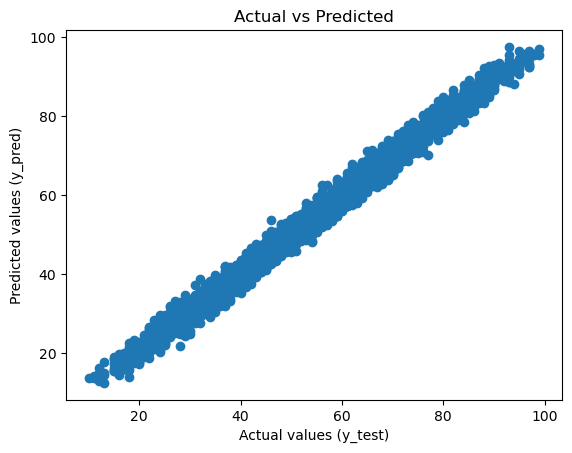

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("Actual vs Predicted")
plt.show()


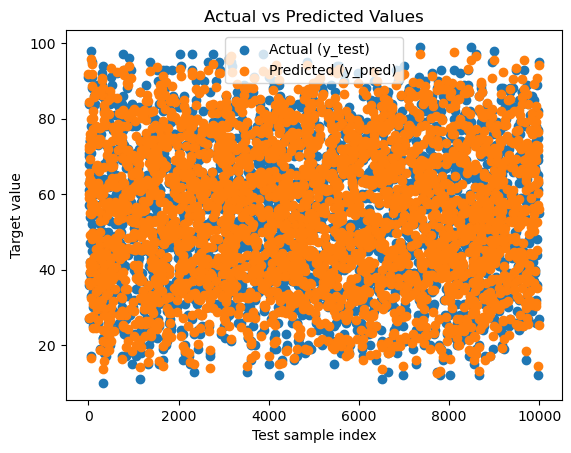

In [53]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_test.index, y_test, label='Actual (y_test)')
plt.scatter(x_test.index, y_pred, label='Predicted (y_pred)')

plt.xlabel("Test sample index")
plt.ylabel("Target value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


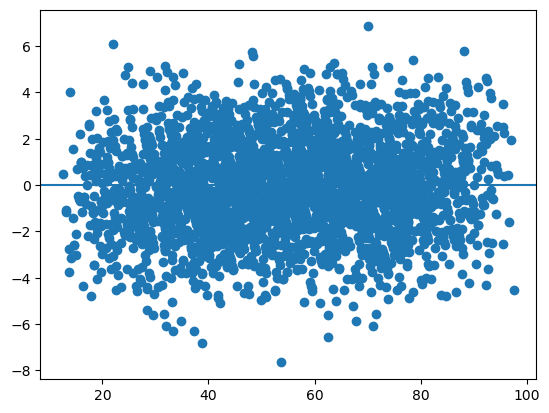

In [55]:
#RESIDUAL PLOT

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.show()


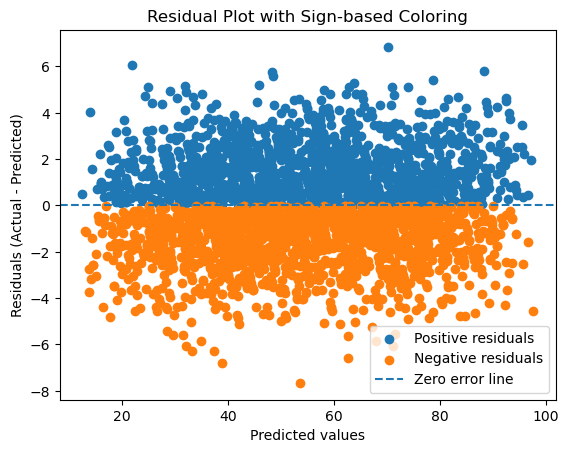

In [59]:
import matplotlib.pyplot as plt
import numpy as np

residuals = y_test - y_pred

plt.figure()

plt.scatter(y_pred[residuals >= 0], residuals[residuals >= 0], label='Positive residuals')
plt.scatter(y_pred[residuals < 0], residuals[residuals < 0], label='Negative residuals')

plt.axhline(0, linestyle='--', label='Zero error line')

plt.xlabel("Predicted values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot with Sign-based Coloring")
plt.legend()
plt.show()



In [62]:
print("Train R²:", model.score(x_train, y_train))
print("Test  R²:", model.score(x_test, y_test))

print("Pred R2:",model.score(x_test,y_pred))


Train R²: 0.9886221887978632
Test  R²: 0.9890110607021136
Pred R2: 1.0


In [64]:
r2_score(y_test,y_pred)

0.9890110607021136

In [65]:
#DEPLOYMENT

In [66]:
import joblib

In [67]:
joblib.dump(model,'model.pkl')

['model.pkl']